In [165]:
from svglib.svglib import svg2rlg
import svglib
from PIL import Image, ImageDraw
import reportlab

In [246]:
#drawing = svg2rlg("NH.svg")
drawing = svg2rlg("godzilla.svg")

In [247]:
inspect_list = []
path_list = []

for item in drawing.contents:
    if type(item) == reportlab.graphics.shapes.Group:
        print('found group')
        inspect_list.append(item)
    else:
        print(item)

found group


In [248]:
while len(inspect_list) > 0:
    group = inspect_list.pop()
    for item in group.contents:
        if type(item) == reportlab.graphics.shapes.Group:
            #print('found group')
            inspect_list.append(item)
        elif type(item) == svglib.svglib.NoStrokePath:
            #print('found nostroke')
            pass
        elif type(item) == reportlab.graphics.shapes.Path:
            #print ('found path')
            #print(dir(path))
            path_list.append(item)
        else:
            print(item)
print("paths found: %s" % len(path_list) )

paths found: 1


In [249]:
coord_paths = []

_MOVETO, _LINETO, _CURVETO, _CLOSEPATH = list(range(4))
_PATH_OP_ARG_COUNT = (2, 2, 6, 0)  # [moveTo, lineTo, curveTo, closePath]
_PATH_OP_NAMES=['moveTo','lineTo','curveTo','closePath']

max_x = 0
max_y = 0

for path in path_list:
    
    tpath = []
    ptr = 0
    
    start = (path.points[0], path.points[1])
    #try:
    if True:
        print("Ops: %s Points: %s" % (len(path.operators), len(path.points)))
        for operator in path.operators:
            if operator == _MOVETO:
                #if len(tpath) > 50:
                coord_paths.append(tpath)
                # reset start
                start = (path.points[ptr], path.points[ptr+1])
                
                max_x = max(max_x, path.points[ptr])
                max_y = max(max_y, path.points[ptr+1])
                tpath = []

                pop_count = _PATH_OP_ARG_COUNT[operator]
                ptr += pop_count

            elif operator == _LINETO:
                
                coord = (path.points[ptr], path.points[ptr+1])
                tpath.append(coord)
                
                max_x = max(max_x, path.points[ptr])
                max_y = max(max_y, path.points[ptr+1])

                pop_count = _PATH_OP_ARG_COUNT[operator]
                ptr += pop_count

            elif operator == _CURVETO:

                coord = (path.points[ptr], path.points[ptr+1])
                tpath.append(coord)

                pop_count = _PATH_OP_ARG_COUNT[operator]
                ptr += pop_count


            elif operator == _CLOSEPATH:
                print('close!')
                coord = start
                tpath.append(coord)
                
    #except Exception as e:
    #    print(e)
    #    print(ptr)
            
    #print(tpath)
    #if len(tpath)>15:
    coord_paths.append(tpath)
print("Tpath count: %s" % len(coord_paths))

Ops: 940 Points: 4312
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
close!
Tpath count: 105


In [250]:
print(max_x)
print(max_y)

262.94538
328.59237


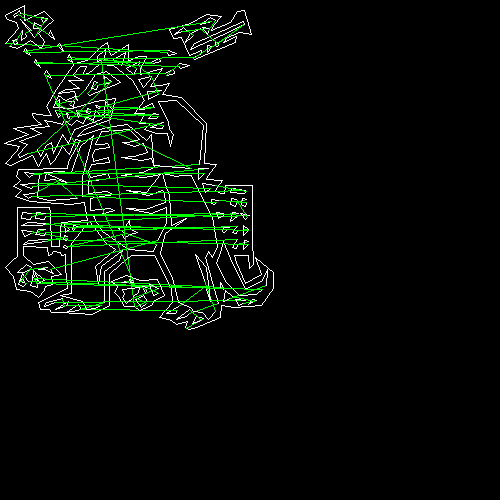

In [251]:
im = Image.new(mode="RGB", size=(500,500))
d = ImageDraw.Draw(im)
last_point = None
for tpath in coord_paths:
    if len(tpath)>0:
        if last_point:
            d.line((last_point,tpath[0]), fill=(0,255,0))
        last_point = tpath[0]
        for point in tpath[1:]:
            d.line((last_point,point), fill=(255,255,255))
            last_point = point
im

In [252]:
import json

with open("godzilla.json", "w") as fp:
    json.dump(coord_paths,fp)

In [ ]:
new_paths = []

while len(coord_paths) > 0:
    # closest
    closest = None
    distance = 100000
    
    current_path = coord_path[0]
    _first_en
    
    for paths in coord_paths[1:]:
        dis = 
    

In [224]:
def distance(a, b):
    x = abs(a[0]-b[0])
    y = abs(a[1]-b[1])
    return sqrt(x**2 + y**2)